<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/13_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data

In [3]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Tensorflow/BTC_USD_2014-11-02_2021-11-11-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [6]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-02,BTC,325.22633,338.01050,338.12950,319.36700
2014-11-03,BTC,331.60083,325.22633,333.75983,319.04350
2014-11-04,BTC,324.71833,331.60083,332.75133,323.06333
2014-11-05,BTC,332.45666,324.71833,335.81166,320.93333
2014-11-06,BTC,336.58500,332.45666,341.49000,328.56166


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2562 entries, 2014-11-02 to 2021-11-11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2562 non-null   object 
 1   Closing Price (USD)  2562 non-null   float64
 2   24h Open (USD)       2562 non-null   float64
 3   24h High (USD)       2562 non-null   float64
 4   24h Low (USD)        2562 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.1+ KB


In [8]:
len(df)

2562

In [9]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [10]:
bitcoin_prices.head()

,Price
Date,
2014-11-02,325.22633
2014-11-03,331.60083
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500


In [11]:
len(bitcoin_prices)

2562

Text(0.5, 1.0, 'BTC historical Data')

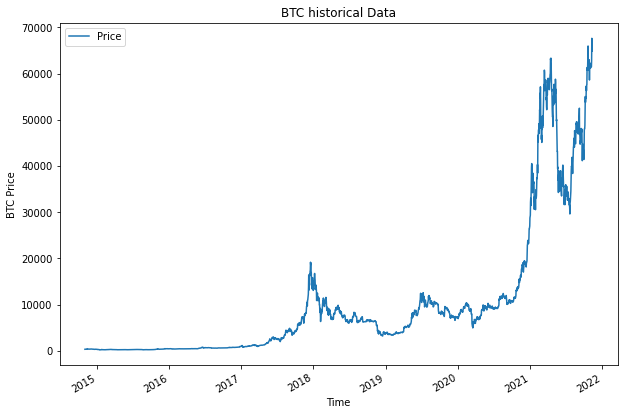

In [12]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

In [13]:
bitcoin_prices = bitcoin_prices.iloc[:-100]

In [14]:
# Deleting last 100 rows
#bitcoin_prices_new = bitcoin_prices.drop(bitcoin_prices.tail(100).index,
                                     #inplace=True)

In [15]:
len(bitcoin_prices)

2462

Text(0.5, 1.0, 'BTC historical Data')

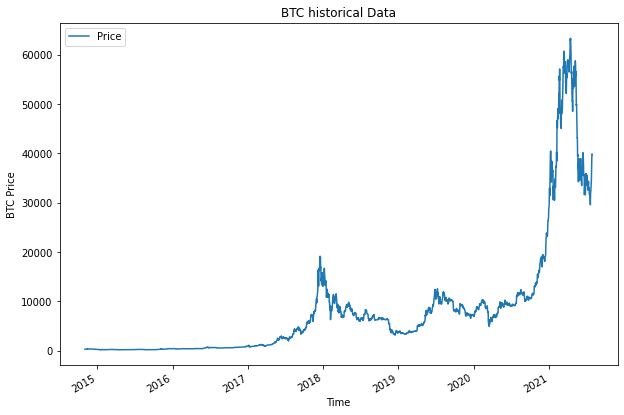

In [16]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

### Train Test split

In [17]:
# bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[-10:], prices[-10:]

(array(['2021-07-21T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
        '2021-07-23T00:00:00.000000000', '2021-07-24T00:00:00.000000000',
        '2021-07-25T00:00:00.000000000', '2021-07-26T00:00:00.000000000',
        '2021-07-27T00:00:00.000000000', '2021-07-28T00:00:00.000000000',
        '2021-07-29T00:00:00.000000000', '2021-07-30T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
        34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
        39917.4493694 , 39810.51797108]))

In [18]:
len(prices)

2462

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1969, 493, 1969, 493)

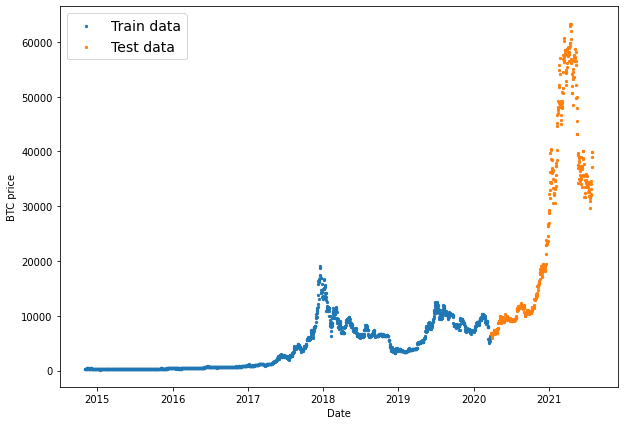

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show()

In [22]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

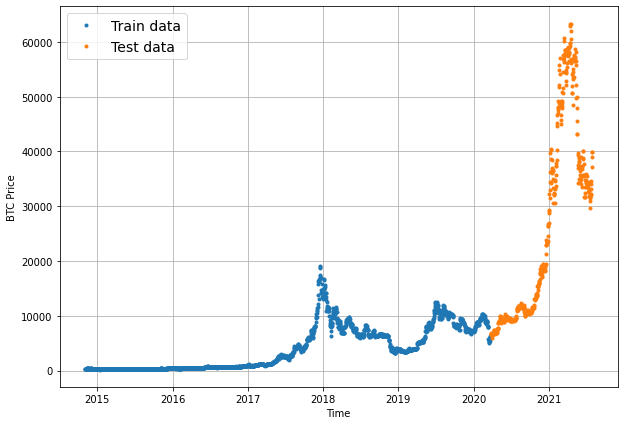

In [23]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Model 0: Naive Forecast (Baseline)

In [24]:
naive_forecast = y_test[:-1]

In [25]:
naive_forecast[:10], naive_forecast[-10:]

(array([6784.31801143, 6706.98508913, 6721.49539238, 6682.7800492 ,
        6229.48834283, 5922.48983509, 6483.73944553, 6446.42134684,
        6537.3364615 , 6850.55871169]),
 array([30940.28728402, 29608.59725347, 32014.43603389, 32203.3656377 ,
        33117.75146222, 34014.618359  , 34574.67066093, 37114.29662368,
        38963.92285736, 39917.4493694 ]))

In [26]:
y_test[-10:]

array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
       34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
       39917.4493694 , 39810.51797108])

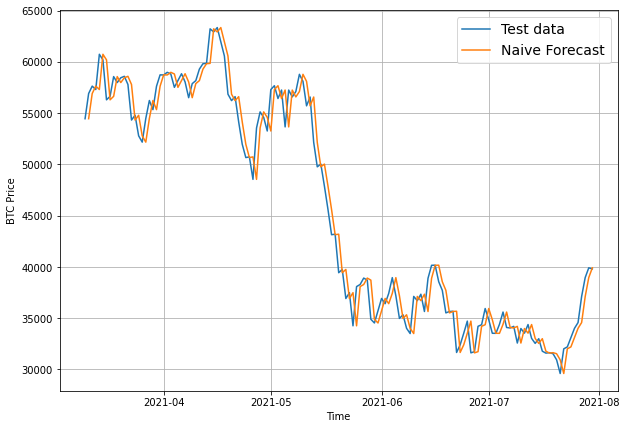

In [27]:
# plot
plt.figure(figsize=(10,7))
#plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, start=350, format="-" ,label="Test data")
plot_time_series(X_test[1:], naive_forecast, start=350, format="-", label="Naive Forecast")

In [28]:
import tensorflow as tf

In [29]:
# implementing MASE: Mean Absolute Scaled Error

def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [30]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9981720899380153

In [31]:
# evaluation values

def evaluate_pred(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [32]:
naive_result = evaluate_pred(y_test[1:], naive_forecast)
naive_result

{'mae': 766.7915,
 'mape': 2.6282535,
 'mase': 0.9981719,
 'mse': 1660526.2,
 'rmse': 1288.614}

### Formatting Data: Windowing dataset

In [33]:
HORIZON = 1
WINDOW_SIZE = 7

In [34]:
prices[:10]

array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
       344.81166, 343.065  , 358.50166, 368.07666])

In [35]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [36]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))

In [37]:
tf.squeeze(test_window).numpy()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [38]:
tf.squeeze(test_label).numpy()

7

In [39]:
import numpy as np

In [40]:
# create a function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

  #1. create a window of specific window_size(add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  #2. create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  #print(f"{window_indexes, window_indexes.shape}")

  #3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(f"{window_indexes, window_indexes.shape}")

  #4. Get labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [41]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2455, 2455)

In [42]:
# view 1st 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} --> Label {full_labels[i]}")

Window: [325.22633 331.60083 324.71833 332.45666 336.585   346.775   344.81166] --> Label [343.065]
Window: [331.60083 324.71833 332.45666 336.585   346.775   344.81166 343.065  ] --> Label [358.50166]
Window: [324.71833 332.45666 336.585   346.775   344.81166 343.065   358.50166] --> Label [368.07666]


In [43]:
# view last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} --> Label {full_labels[i-3]}")

Window: [29608.59725347 32014.43603389 32203.3656377  33117.75146222
 34014.618359   34574.67066093 37114.29662368] --> Label [38963.92285736]
Window: [32014.43603389 32203.3656377  33117.75146222 34014.618359
 34574.67066093 37114.29662368 38963.92285736] --> Label [39917.4493694]
Window: [32203.3656377  33117.75146222 34014.618359   34574.67066093
 37114.29662368 38963.92285736 39917.4493694 ] --> Label [39810.51797108]


In [44]:
prices[-1]

39810.5179710787

### Turining windows into training and test sets

In [45]:
def make_train_test_split(windows, labels, test_split=0.2):
 
  splits_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [46]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [47]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 486, 1969, 486)

In [48]:
train_windows[:5], train_labels[:5]

(array([[325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
         344.81166],
        [331.60083, 324.71833, 332.45666, 336.585  , 346.775  , 344.81166,
         343.065  ],
        [324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666]]), array([[343.065  ],
        [358.50166],
        [368.07666],
        [376.99666],
        [442.10666]]))

In [49]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [50]:
len(train_labels[:-HORIZON-1]), len(y_train[WINDOW_SIZE:])

(1967, 1962)

### Make modelling checkpoint

In [51]:
import os

# Function to implement a Modelcheckpoint with a specific filename

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [52]:
os.getcwd()

'/content/drive/My Drive/Tensorflow'

### Model 1: Dense Model (window=7, horizon=1)

In [53]:
# set random seed
tf.random.set_seed(42)

#1. construct model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(HORIZON, activation="linear")
],name="model_1_dense")

#2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

#3.Fit the model
history_1 = model_1.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
16/16 [==============================] - 4s 122ms/step - loss: 1032.8834 - mae: 1032.8834 - mse: 3229531.0000 - val_loss: 3140.9480 - val_mae: 3140.9480 - val_mse: 20274452.0000
Epoch 2/100
16/16 [==============================] - 1s 45ms/step - loss: 351.4614 - mae: 351.4614 - mse: 394950.5000 - val_loss: 1664.4357 - val_mae: 1664.4357 - val_mse: 6151715.5000
Epoch 3/100
16/16 [==============================] - 1s 34ms/step - loss: 241.4211 - mae: 241.4211 - mse: 235068.6250 - val_loss: 1542.0272 - val_mae: 1542.0272 - val_mse: 5384311.0000
Epoch 4/100
16/16 [==============================] - 1s 35ms/step - loss: 222.6001 - mae: 222.6001 - mse: 210325.4062 - val_loss: 1364.7572 - val_mae: 1364.7572 - val_mse: 4591355.5000
Epoch 5/100
16/16 [==============================] - 1s 36ms/step - loss: 211.6061 - mae: 211.6061 - mse: 193104.7031 - val_loss: 1275.9801 - val_mae: 1275.9802 - val_mse: 4290321.0000
Epoch 6/100
16/16 [==============================] - 1s 35ms/step - lo

In [54]:
model_1.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 788.3877 - mae: 788.3877 - mse: 1714944.1250


[788.3876953125, 788.3876953125, 1714944.125]

In [55]:
# load saved best model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 775.8202 - mae: 775.8202 - mse: 1708697.2500


[775.8201904296875, 775.8201904296875, 1708697.25]

### Making forecasting with a model

In [56]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [57]:
model_1_preds = make_preds(model_1, test_windows)

In [58]:
len(model_1_preds)

486

In [59]:
test_labels.shape, model_1_preds.shape

((486, 1), TensorShape([486]))

In [60]:
model_1_results = evaluate_pred(y_true=tf.squeeze(test_labels), 
                                y_pred=model_1_preds)
model_1_results

{'mae': 775.8202,
 'mape': 2.623344,
 'mase': 1.0013326,
 'mse': 1708697.4,
 'rmse': 1307.1715}

In [61]:
naive_result

{'mae': 766.7915,
 'mape': 2.6282535,
 'mase': 0.9981719,
 'mse': 1660526.2,
 'rmse': 1288.614}

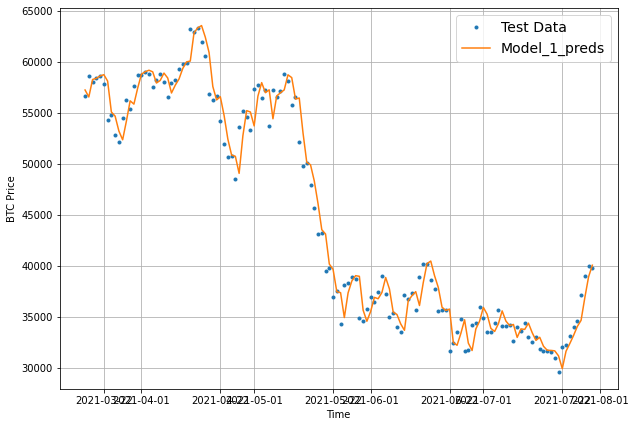

In [62]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_1_preds, 
                 start=offset,
                 format="-",
                 label="Model_1_preds")

### Model 2: Dense (window=30, horizon=1)

In [63]:
HORIZON = 1 
WINDOW_SIZE = 30

In [64]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2432, 2432)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 463, 1969, 463)

In [66]:
# Model 2
# set random seed
tf.random.set_seed(42)

#1. construct model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(HORIZON, activation="linear")
],name="model_2_dense")

#2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

#3.Fit the model
history_2 = model_2.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=0,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [67]:
model_2.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 1610.4492 - mae: 1610.4492 - mse: 5395258.0000


[1610.44921875, 1610.44921875, 5395258.0]

In [68]:
# load saved best model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 4ms/step - loss: 866.3364 - mae: 866.3364 - mse: 1976023.2500


[866.3363647460938, 866.3363647460938, 1976023.25]

In [69]:
model_2_preds = make_preds(model_2, test_windows)

In [70]:
model_2_results = evaluate_pred(y_true=tf.squeeze(test_labels), 
                                y_pred=model_2_preds)
model_2_results

{'mae': 866.3363,
 'mape': 2.8384595,
 'mase': 1.0773655,
 'mse': 1976023.4,
 'rmse': 1405.7109}

In [71]:
naive_result

{'mae': 766.7915,
 'mape': 2.6282535,
 'mase': 0.9981719,
 'mse': 1660526.2,
 'rmse': 1288.614}

In [72]:
model_1_results

{'mae': 775.8202,
 'mape': 2.623344,
 'mase': 1.0013326,
 'mse': 1708697.4,
 'rmse': 1307.1715}

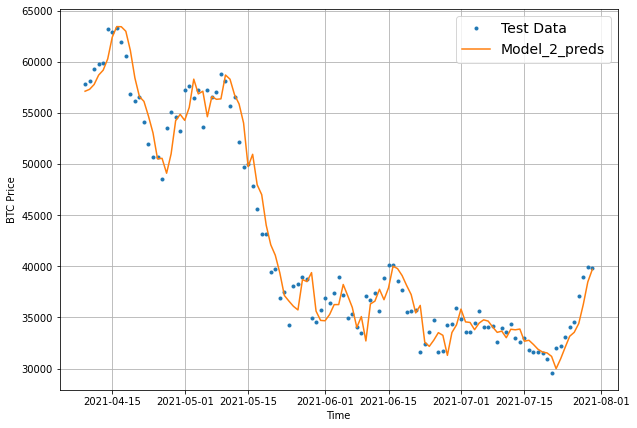

In [73]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_2_preds, 
                 start=offset,
                 format="-",
                 label="Model_2_preds")


### Model 3: Dense (Window size =30, horizon=1)

In [74]:
HORIZON = 7 
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2426, 2426)

In [75]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 457, 1969, 457)

In [76]:
# Model 3
# set random seed
tf.random.set_seed(42)

#1. construct model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(HORIZON, activation="linear")
],name="model_3_dense")

#2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

#3.Fit the model
history_3 = model_3.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=0,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [77]:
model_3.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 1793.6003 - mae: 1793.6003 - mse: 8759309.0000


[1793.600341796875, 1793.600341796875, 8759309.0]

In [78]:
# load saved best model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows,test_labels)

15/15 [==============================] - 0s 2ms/step - loss: 1782.9849 - mae: 1782.9849 - mse: 8816078.0000


[1782.98486328125, 1782.98486328125, 8816078.0]

In [79]:
model_3_preds = make_preds(model_3, test_windows)

In [80]:
model_3_preds.shape

TensorShape([457, 7])

In [81]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [82]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), 
                                y_pred=(model_3_preds))
model_3_results

{'mae': 1782.9851,
 'mape': 5.7158628,
 'mase': 2.2096403,
 'mse': 8816078.0,
 'rmse': 2048.497}

In [83]:
model_1_results, model_2_results

({'mae': 775.8202,
  'mape': 2.623344,
  'mase': 1.0013326,
  'mse': 1708697.4,
  'rmse': 1307.1715},
 {'mae': 866.3363,
  'mape': 2.8384595,
  'mase': 1.0773655,
  'mse': 1976023.4,
  'rmse': 1405.7109})

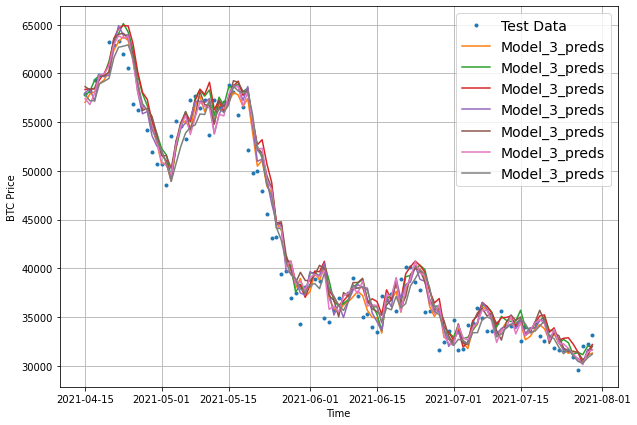

In [84]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=model_3_preds, 
                 start=offset,
                 format="-",
                 label="Model_3_preds")

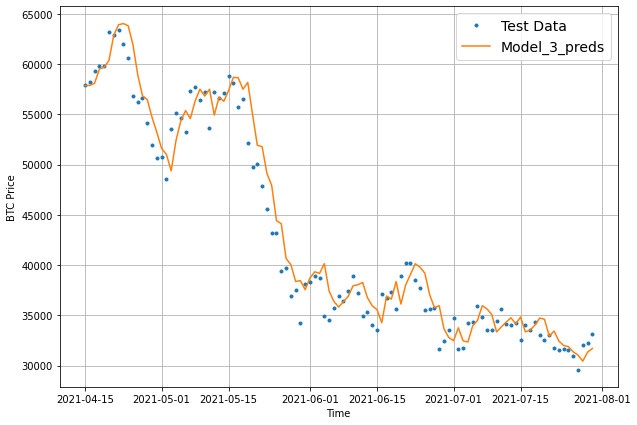

In [85]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-",
                 label="Model_3_preds")

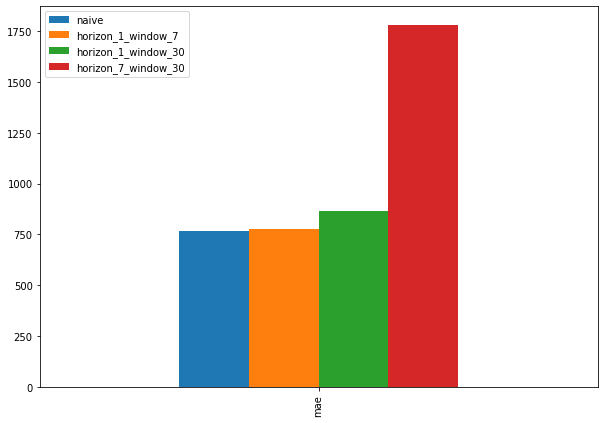

In [86]:
pd.DataFrame({"naive": naive_result["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D

In [87]:
HORIZON = 1
WINDOW_SIZE = 7
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2455, 2455)

In [88]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1969, 486, 1969, 486)

In [89]:
train_windows[0].shape

(7,)

In [90]:
x = tf.constant(train_windows[0])
x, x.shape

(<tf.Tensor: shape=(7,), dtype=float64, numpy=
 array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
        344.81166])>, TensorShape([7]))

In [91]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [92]:
x.shape, expand_dims_layer(x).shape

(TensorShape([7]), TensorShape([7, 1]))

In [93]:
# Model 4
# set random seed
tf.random.set_seed(42)

#1. construct model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
                               tf.keras.layers.Dense(HORIZON)
],name="model_4_conv1d")

#2. Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
#3.Fit the model
history_4 = model_4.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
16/16 [==============================] - 16s 130ms/step - loss: 1708.5829 - mae: 1708.5829 - mse: 7589359.5000 - val_loss: 1732.5792 - val_mae: 1732.5792 - val_mse: 7710916.5000
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 425.3029 - mae: 425.3029 - mse: 577189.4375 - val_loss: 2059.8394 - val_mae: 2059.8394 - val_mse: 8560340.0000
Epoch 3/100
16/16 [==============================] - 1s 47ms/step - loss: 268.3039 - mae: 268.3039 - mse: 281738.4062 - val_loss: 1371.0137 - val_mae: 1371.0137 - val_mse: 5097089.0000
Epoch 4/100
16/16 [==============================] - 1s 49ms/step - loss: 233.2763 - mae: 233.2763 - mse: 222883.8906 - val_loss: 1355.8508 - val_mae: 1355.8508 - val_mse: 4988311.5000
Epoch 5/100
16/16 [==============================] - 1s 64ms/step - loss: 223.7745 - mae: 223.7745 - mse: 215756.4688 - val_loss: 1346.7809 - val_mae: 1346.7809 - val_mse: 4829220.0000
Epoch 6/100
16/16 [==============================] - 1s 49ms/step - los

In [94]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [95]:
model_4.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 15ms/step - loss: 794.2012 - mae: 794.2012 - mse: 1728943.7500


[794.201171875, 794.201171875, 1728943.75]

In [96]:
# load saved best model
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 783.6877 - mae: 783.6877 - mse: 1727535.7500


[783.6876831054688, 783.6876831054688, 1727535.75]

In [97]:
model_4_preds = make_preds(model_4, test_windows)

In [98]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), 
                                y_pred=(model_4_preds))
model_4_results

{'mae': 783.6877,
 'mape': 2.6479404,
 'mase': 1.011487,
 'mse': 1727535.6,
 'rmse': 1314.3574}

In [99]:
model_1_results

{'mae': 775.8202,
 'mape': 2.623344,
 'mase': 1.0013326,
 'mse': 1708697.4,
 'rmse': 1307.1715}

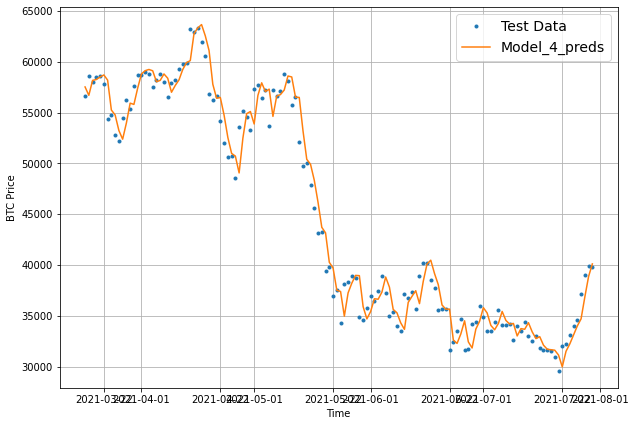

In [100]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=(model_4_preds), 
                 start=offset,
                 format="-",
                 label="Model_4_preds")

### Model 5: LSTM

In [101]:
#Model 5

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs,name="model_5_lstm")

#2. Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
#3.Fit the model
history_5 = model_5.fit(train_windows,
                        train_labels,
                        epochs=100,
                        verbose=0,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_5.name)])


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [102]:
model_5.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 849.1218 - mae: 849.1218 - mse: 1889147.0000


[849.1217651367188, 849.1217651367188, 1889147.0]

In [103]:
# load saved best model
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows,test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 836.2173 - mae: 836.2173 - mse: 1896181.5000


[836.2173461914062, 836.2173461914062, 1896181.5]

In [104]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), 
                                y_pred=(model_5_preds))
model_5_results

{'mae': 836.21735,
 'mape': 2.8361795,
 'mase': 1.0792857,
 'mse': 1896181.5,
 'rmse': 1377.019}

In [105]:
model_1_results, model_4_results

({'mae': 775.8202,
  'mape': 2.623344,
  'mase': 1.0013326,
  'mse': 1708697.4,
  'rmse': 1307.1715},
 {'mae': 783.6877,
  'mape': 2.6479404,
  'mase': 1.011487,
  'mse': 1727535.6,
  'rmse': 1314.3574})

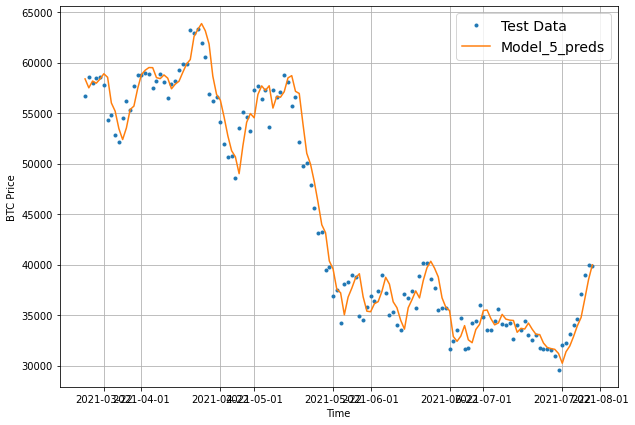

In [106]:
#plot prediction
offset = 350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=(model_5_preds), 
                 start=offset,
                 format="-",
                 label="Model_5_preds")

### Multivariate time series data

In [107]:
bitcoin_prices.head()

,Price
Date,
2014-11-02,325.22633
2014-11-03,331.60083
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500


In [108]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [109]:
# create date ranges of where specific block reward values shouldbe
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(615, 2024)

In [110]:
# Add in block reward values as a feature in the dataframe
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [111]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-07-26,34574.670661,6.25
2021-07-27,37114.296624,6.25
2021-07-28,38963.922857,6.25
2021-07-29,39917.449369,6.25
2021-07-30,39810.517971,6.25


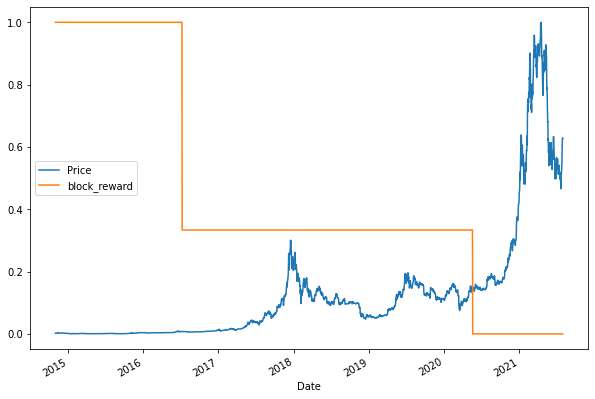

In [112]:
# plot
from sklearn.preprocessing import minmax_scale
scaled_prices_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                        columns=bitcoin_prices_block.columns,
                                                   index=bitcoin_prices_block.index)
scaled_prices_block_df.plot(figsize=(10,7))

### Windowed dataset for Multivariate timeseries with pandas

In [113]:
HORIZON = 1
WINDOW_SIZE = 7

In [114]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()


for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-02,325.22633,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,331.60083,25,325.22633,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,324.71833,25,331.60083,325.22633,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,331.60083,325.22633,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,331.60083,325.22633,NaN,NaN,NaN
2014-11-07,346.77500,25,336.58500,332.45666,324.71833,331.60083,325.22633,NaN,NaN
2014-11-08,344.81166,25,346.77500,336.58500,332.45666,324.71833,331.60083,325.22633,NaN
2014-11-09,343.06500,25,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083,325.22633
2014-11-10,358.50166,25,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083


In [115]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-07-26,34574.670661,6.25,34014.618359,33117.751462,32203.365638,32014.436034,29608.597253,30940.287284,31537.805190
2021-07-27,37114.296624,6.25,34574.670661,34014.618359,33117.751462,32203.365638,32014.436034,29608.597253,30940.287284
2021-07-28,38963.922857,6.25,37114.296624,34574.670661,34014.618359,33117.751462,32203.365638,32014.436034,29608.597253
2021-07-29,39917.449369,6.25,38963.922857,37114.296624,34574.670661,34014.618359,33117.751462,32203.365638,32014.436034
2021-07-30,39810.517971,6.25,39917.449369,38963.922857,37114.296624,34574.670661,34014.618359,33117.751462,32203.365638


In [116]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [117]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-09,25.0,344.811646,346.774994,336.584991,332.456665,324.718323,331.600830,325.226318
2014-11-10,25.0,343.065002,344.811646,346.774994,336.584991,332.456665,324.718323,331.600830
2014-11-11,25.0,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665,324.718323
2014-11-12,25.0,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665
2014-11-13,25.0,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991


In [118]:
y.head()

Date
2014-11-09    343.065002
2014-11-10    358.501648
2014-11-11    368.076660
2014-11-12    376.996674
2014-11-13    442.106659
Name: Price, dtype: float32

In [119]:
# Split train Test
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1964, 1964, 491, 491)

### Model 7: Dense Multivariate timeseries

In [120]:
#Model 6 
# set random seed
tf.random.set_seed(42)

#1. construct model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(128, activation="relu"),
                               tf.keras.layers.Dense(HORIZON, activation="linear")
],name="model_6_dense_multi")

#2. Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

#3.Fit the model
history_6 = model_6.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/16 [>.............................] - ETA: 5s - loss: 3431.3057 - mae: 3431.3057 - mse: 20876594.0000INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 2s 117ms/step - loss: 1773.6256 - mae: 1773.6256 - mse: 8055896.0000 - val_loss: 1651.9038 - val_mae: 1651.9038 - val_mse: 7448398.5000
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 427.6541 - mae: 427.6541 - mse: 602230.9375 - val_loss: 2124.9846 - val_mae: 2124.9846 - val_mse: 9454299.0000
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 308.0172 - mae: 308.0172 - mse: 347904.5312 - val_loss: 1683.9064 - val_mae: 1683.9064 - val_mse: 7607718.5000
Epoch 4/100
 1/16 [>.............................] - ETA: 0s - loss: 328.0413 - mae: 328.0413 - mse: 419126.3125INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 40ms/step - loss: 263.2359 - mae: 263.2359 - mse: 282717.6250 - val_loss: 1491.2589 - val_mae: 1491.2589 - val_mse: 6034227.5000
Epoch 5/100
 1/16 [>.............................] - ETA: 0s - loss: 238.7433 - mae: 238.7433 - mse: 301602.8438INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 249.5043 - mae: 249.5043 - mse: 261275.0156 - val_loss: 1457.2988 - val_mae: 1457.2988 - val_mse: 5659212.0000
Epoch 6/100
 1/16 [>.............................] - ETA: 0s - loss: 236.0178 - mae: 236.0178 - mse: 212635.7188INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 242.7666 - mae: 242.7666 - mse: 248987.6094 - val_loss: 1436.4209 - val_mae: 1436.4209 - val_mse: 5410264.0000
Epoch 7/100
 1/16 [>.............................] - ETA: 0s - loss: 201.9822 - mae: 201.9822 - mse: 191300.7500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 37ms/step - loss: 235.2623 - mae: 235.2623 - mse: 238223.1719 - val_loss: 1413.1708 - val_mae: 1413.1708 - val_mse: 5166838.5000
Epoch 8/100
 1/16 [>.............................] - ETA: 0s - loss: 255.2974 - mae: 255.2974 - mse: 277130.8125INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 228.7894 - mae: 228.7894 - mse: 223003.6562 - val_loss: 1388.5005 - val_mae: 1388.5005 - val_mse: 4895407.0000
Epoch 9/100
 1/16 [>.............................] - ETA: 0s - loss: 263.2450 - mae: 263.2450 - mse: 311438.5000INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 221.5830 - mae: 221.5830 - mse: 215861.8594 - val_loss: 1352.7228 - val_mae: 1352.7228 - val_mse: 4619747.0000
Epoch 10/100
 1/16 [>.............................] - ETA: 0s - loss: 179.9489 - mae: 179.9489 - mse: 118095.1406INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 35ms/step - loss: 215.1958 - mae: 215.1958 - mse: 202302.3438 - val_loss: 1285.8954 - val_mae: 1285.8954 - val_mse: 4315692.0000
Epoch 11/100
 1/16 [>.............................] - ETA: 0s - loss: 261.3036 - mae: 261.3036 - mse: 331368.6875INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 54ms/step - loss: 207.4930 - mae: 207.4930 - mse: 190070.7656 - val_loss: 1268.8606 - val_mae: 1268.8606 - val_mse: 4059336.7500
Epoch 12/100
13/16 [=======================>......] - ETA: 0s - loss: 201.3484 - mae: 201.3484 - mse: 177369.6719INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 40ms/step - loss: 200.5864 - mae: 200.5864 - mse: 179044.5312 - val_loss: 1218.9144 - val_mae: 1218.9144 - val_mse: 3794898.0000
Epoch 13/100
15/16 [===========================>..] - ETA: 0s - loss: 194.5323 - mae: 194.5323 - mse: 168936.9062INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 194.3958 - mae: 194.3958 - mse: 168680.6406 - val_loss: 1164.9875 - val_mae: 1164.9875 - val_mse: 3558708.7500
Epoch 14/100
 1/16 [>.............................] - ETA: 0s - loss: 132.9440 - mae: 132.9440 - mse: 60059.5234INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 189.4922 - mae: 189.4922 - mse: 159125.3438 - val_loss: 1137.7592 - val_mae: 1137.7592 - val_mse: 3466051.2500
Epoch 15/100
 1/16 [>.............................] - ETA: 0s - loss: 203.1319 - mae: 203.1319 - mse: 174593.9844INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 184.1119 - mae: 184.1119 - mse: 152633.6406 - val_loss: 1120.0726 - val_mae: 1120.0726 - val_mse: 3194563.5000
Epoch 16/100
 1/16 [>.............................] - ETA: 0s - loss: 207.9729 - mae: 207.9729 - mse: 207929.9375INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 186.9556 - mae: 186.9556 - mse: 150972.9844 - val_loss: 1078.9216 - val_mae: 1078.9216 - val_mse: 3041755.5000
Epoch 17/100
 1/16 [>.............................] - ETA: 0s - loss: 203.3566 - mae: 203.3566 - mse: 211136.0156INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 176.4673 - mae: 176.4673 - mse: 139687.2344 - val_loss: 1073.5608 - val_mae: 1073.5608 - val_mse: 2919417.2500
Epoch 18/100
 1/16 [>.............................] - ETA: 0s - loss: 165.2142 - mae: 165.2142 - mse: 146138.0312INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 174.0956 - mae: 174.0956 - mse: 135538.2188 - val_loss: 1047.4913 - val_mae: 1047.4913 - val_mse: 2892084.7500
Epoch 19/100
16/16 [==============================] - 0s 4ms/step - loss: 172.2816 - mae: 172.2816 - mse: 133718.5156 - val_loss: 1096.1407 - val_mae: 1096.1407 - val_mse: 2862956.0000
Epoch 20/100
 1/16 [>.............................] - ETA: 0s - loss: 183.9804 - mae: 183.9804 - mse: 132948.7500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 168.4266 - mae: 168.4266 - mse: 124954.7969 - val_loss: 1006.2114 - val_mae: 1006.2114 - val_mse: 2656667.2500
Epoch 21/100
 1/16 [>.............................] - ETA: 0s - loss: 210.9843 - mae: 210.9843 - mse: 162228.6562INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 35ms/step - loss: 172.6204 - mae: 172.6204 - mse: 128689.9766 - val_loss: 1002.3210 - val_mae: 1002.3210 - val_mse: 2525977.5000
Epoch 22/100
16/16 [==============================] - 0s 4ms/step - loss: 168.9632 - mae: 168.9632 - mse: 122833.4531 - val_loss: 1008.2184 - val_mae: 1008.2184 - val_mse: 2514523.0000
Epoch 23/100
 1/16 [>.............................] - ETA: 0s - loss: 167.9177 - mae: 167.9177 - mse: 104270.3516INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 164.6753 - mae: 164.6753 - mse: 122508.0625 - val_loss: 975.1561 - val_mae: 975.1561 - val_mse: 2531703.5000
Epoch 24/100
 1/16 [>.............................] - ETA: 0s - loss: 132.1505 - mae: 132.1505 - mse: 74777.6641INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 42ms/step - loss: 159.1805 - mae: 159.1805 - mse: 116062.9219 - val_loss: 946.5645 - val_mae: 946.5645 - val_mse: 2334988.5000
Epoch 25/100
16/16 [==============================] - 0s 4ms/step - loss: 157.3387 - mae: 157.3387 - mse: 114157.4141 - val_loss: 1016.3052 - val_mae: 1016.3052 - val_mse: 2731841.7500
Epoch 26/100
16/16 [==============================] - 0s 5ms/step - loss: 163.6440 - mae: 163.6440 - mse: 116601.0859 - val_loss: 955.8693 - val_mae: 955.8693 - val_mse: 2278956.2500
Epoch 27/100
16/16 [==============================] - 0s 4ms/step - loss: 153.3707 - mae: 153.3707 - mse: 109530.0469 - val_loss: 971.2746 - val_mae: 971.2746 - val_mse: 2313087.2500
Epoch 28/100
16/16 [==============================] - 0s 4ms/step - loss: 153.4173 - mae: 153.4173 - mse: 107443.2188 - val_loss: 952.9232 - val_mae: 952.9232 - val_mse: 2247986.0000
Epoch 29/100
 1/16 [>.............................] - ETA: 0s - loss: 226.4437 - mae: 226.4437 

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 153.5595 - mae: 153.5595 - mse: 108277.0938 - val_loss: 890.5321 - val_mae: 890.5321 - val_mse: 2088634.0000
Epoch 30/100
16/16 [==============================] - 0s 5ms/step - loss: 147.9492 - mae: 147.9492 - mse: 104180.7891 - val_loss: 913.0085 - val_mae: 913.0085 - val_mse: 2234223.5000
Epoch 31/100
16/16 [==============================] - 0s 5ms/step - loss: 149.3195 - mae: 149.3195 - mse: 102433.3750 - val_loss: 894.5047 - val_mae: 894.5047 - val_mse: 2153370.5000
Epoch 32/100
 1/16 [>.............................] - ETA: 0s - loss: 137.9360 - mae: 137.9360 - mse: 65964.6953INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 148.2972 - mae: 148.2972 - mse: 103548.3672 - val_loss: 886.4583 - val_mae: 886.4583 - val_mse: 2032177.3750
Epoch 33/100
12/16 [=====================>........] - ETA: 0s - loss: 147.9191 - mae: 147.9191 - mse: 100181.8984INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 147.1261 - mae: 147.1261 - mse: 101866.9062 - val_loss: 861.1718 - val_mae: 861.1718 - val_mse: 1979763.7500
Epoch 34/100
 1/16 [>.............................] - ETA: 0s - loss: 97.9233 - mae: 97.9233 - mse: 36492.7656INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 145.5839 - mae: 145.5839 - mse: 100733.8047 - val_loss: 858.7346 - val_mae: 858.7346 - val_mse: 1958447.0000
Epoch 35/100
 1/16 [>.............................] - ETA: 0s - loss: 123.7681 - mae: 123.7681 - mse: 86714.2500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 145.0859 - mae: 145.0859 - mse: 98675.2109 - val_loss: 851.8306 - val_mae: 851.8306 - val_mse: 1937205.6250
Epoch 36/100
16/16 [==============================] - 0s 5ms/step - loss: 153.4435 - mae: 153.4435 - mse: 106212.6250 - val_loss: 1040.3544 - val_mae: 1040.3544 - val_mse: 2486932.5000
Epoch 37/100
16/16 [==============================] - 0s 5ms/step - loss: 162.2614 - mae: 162.2614 - mse: 104923.6484 - val_loss: 980.0486 - val_mae: 980.0486 - val_mse: 2465174.0000
Epoch 38/100
16/16 [==============================] - 0s 5ms/step - loss: 155.0956 - mae: 155.0956 - mse: 103760.8047 - val_loss: 882.1628 - val_mae: 882.1628 - val_mse: 2081242.0000
Epoch 39/100
 1/16 [>.............................] - ETA: 0s - loss: 144.9704 - mae: 144.9704 - mse: 139248.5312INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 37ms/step - loss: 153.9438 - mae: 153.9438 - mse: 106690.5547 - val_loss: 844.0436 - val_mae: 844.0436 - val_mse: 1938030.5000
Epoch 40/100
 1/16 [>.............................] - ETA: 0s - loss: 111.6650 - mae: 111.6650 - mse: 74645.2500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 148.9577 - mae: 148.9577 - mse: 100877.0938 - val_loss: 831.5247 - val_mae: 831.5247 - val_mse: 1877950.2500
Epoch 41/100
 1/16 [>.............................] - ETA: 0s - loss: 120.5650 - mae: 120.5650 - mse: 58435.3477INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 140.5715 - mae: 140.5715 - mse: 94919.9531 - val_loss: 829.9855 - val_mae: 829.9855 - val_mse: 1880953.3750
Epoch 42/100
16/16 [==============================] - 0s 5ms/step - loss: 141.2649 - mae: 141.2649 - mse: 95187.8438 - val_loss: 844.4479 - val_mae: 844.4479 - val_mse: 1938942.1250
Epoch 43/100
16/16 [==============================] - 0s 4ms/step - loss: 140.4561 - mae: 140.4561 - mse: 93580.7578 - val_loss: 833.0386 - val_mae: 833.0386 - val_mse: 1894854.0000
Epoch 44/100
 1/16 [>.............................] - ETA: 0s - loss: 121.4715 - mae: 121.4715 - mse: 100263.9609INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 55ms/step - loss: 140.1024 - mae: 140.1024 - mse: 94773.9375 - val_loss: 828.5627 - val_mae: 828.5627 - val_mse: 1878366.6250
Epoch 45/100
16/16 [==============================] - 0s 5ms/step - loss: 137.4448 - mae: 137.4448 - mse: 92539.2422 - val_loss: 828.6083 - val_mae: 828.6083 - val_mse: 1879229.7500
Epoch 46/100
16/16 [==============================] - 0s 4ms/step - loss: 147.4979 - mae: 147.4979 - mse: 95039.1484 - val_loss: 899.8217 - val_mae: 899.8217 - val_mse: 2113995.5000
Epoch 47/100
16/16 [==============================] - 0s 4ms/step - loss: 141.2265 - mae: 141.2265 - mse: 94043.9453 - val_loss: 936.0598 - val_mae: 936.0598 - val_mse: 2247856.0000
Epoch 48/100
16/16 [==============================] - 0s 5ms/step - loss: 144.0219 - mae: 144.0219 - mse: 96875.3984 - val_loss: 841.9941 - val_mae: 841.9941 - val_mse: 1914280.1250
Epoch 49/100
16/16 [==============================] - 0s 5ms/step - loss: 141.6269 - mae: 141.6269 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 35ms/step - loss: 137.8759 - mae: 137.8759 - mse: 90681.8672 - val_loss: 811.2205 - val_mae: 811.2205 - val_mse: 1818559.6250
Epoch 51/100
16/16 [==============================] - 0s 5ms/step - loss: 134.9082 - mae: 134.9082 - mse: 90439.0625 - val_loss: 822.1262 - val_mae: 822.1262 - val_mse: 1806022.3750
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 137.1550 - mae: 137.1550 - mse: 91604.0156 - val_loss: 1046.6444 - val_mae: 1046.6444 - val_mse: 2478500.2500
Epoch 53/100
 1/16 [>.............................] - ETA: 0s - loss: 163.6135 - mae: 163.6135 - mse: 94727.6953INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 154.4255 - mae: 154.4255 - mse: 99429.9922 - val_loss: 808.1399 - val_mae: 808.1399 - val_mse: 1806912.6250
Epoch 54/100
 1/16 [>.............................] - ETA: 0s - loss: 121.3342 - mae: 121.3342 - mse: 67363.6250INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 37ms/step - loss: 134.9304 - mae: 134.9304 - mse: 90953.0391 - val_loss: 805.0660 - val_mae: 805.0660 - val_mse: 1796846.7500
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 136.6694 - mae: 136.6694 - mse: 90194.7266 - val_loss: 862.9132 - val_mae: 862.9132 - val_mse: 1965082.1250
Epoch 56/100
 1/16 [>.............................] - ETA: 0s - loss: 159.3839 - mae: 159.3839 - mse: 124514.3672INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 37ms/step - loss: 136.5758 - mae: 136.5758 - mse: 89534.3281 - val_loss: 797.9313 - val_mae: 797.9313 - val_mse: 1773154.6250
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 134.8364 - mae: 134.8364 - mse: 89984.5859 - val_loss: 798.2034 - val_mae: 798.2034 - val_mse: 1752847.3750
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 134.5729 - mae: 134.5729 - mse: 89712.8047 - val_loss: 861.5033 - val_mae: 861.5033 - val_mse: 1888151.0000
Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 140.0117 - mae: 140.0117 - mse: 94692.3281 - val_loss: 829.0715 - val_mae: 829.0715 - val_mse: 1856637.8750
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 137.9830 - mae: 137.9830 - mse: 90672.0156 - val_loss: 798.4792 - val_mae: 798.4792 - val_mse: 1773146.0000
Epoch 61/100
 1/16 [>.............................] - ETA: 0s - loss: 114.1882 - mae: 114.1882 - mse: 

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 39ms/step - loss: 134.3814 - mae: 134.3814 - mse: 88937.2969 - val_loss: 787.0349 - val_mae: 787.0349 - val_mse: 1732125.2500
Epoch 62/100
 1/16 [>.............................] - ETA: 0s - loss: 148.9108 - mae: 148.9108 - mse: 103635.6172INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 134.6163 - mae: 134.6163 - mse: 87334.2578 - val_loss: 785.6671 - val_mae: 785.6671 - val_mse: 1729731.5000
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 134.7008 - mae: 134.7008 - mse: 88215.5000 - val_loss: 817.2717 - val_mae: 817.2717 - val_mse: 1777923.8750
Epoch 64/100
 1/16 [>.............................] - ETA: 0s - loss: 123.6501 - mae: 123.6501 - mse: 74045.2656INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 134.9743 - mae: 134.9743 - mse: 89772.8516 - val_loss: 785.1961 - val_mae: 785.1961 - val_mse: 1730867.3750
Epoch 65/100
16/16 [==============================] - 0s 5ms/step - loss: 132.6806 - mae: 132.6806 - mse: 87794.4219 - val_loss: 817.4891 - val_mae: 817.4891 - val_mse: 1818753.6250
Epoch 66/100
16/16 [==============================] - 0s 4ms/step - loss: 135.2603 - mae: 135.2603 - mse: 89391.3438 - val_loss: 790.7407 - val_mae: 790.7407 - val_mse: 1726048.7500
Epoch 67/100
 1/16 [>.............................] - ETA: 0s - loss: 143.4937 - mae: 143.4937 - mse: 91813.4219INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 37ms/step - loss: 132.9602 - mae: 132.9602 - mse: 87783.9922 - val_loss: 781.7540 - val_mae: 781.7540 - val_mse: 1711970.2500
Epoch 68/100
16/16 [==============================] - 0s 5ms/step - loss: 135.7143 - mae: 135.7143 - mse: 89064.9609 - val_loss: 799.7667 - val_mae: 799.7667 - val_mse: 1769964.7500
Epoch 69/100
16/16 [==============================] - 0s 4ms/step - loss: 133.8144 - mae: 133.8144 - mse: 87354.3047 - val_loss: 790.8821 - val_mae: 790.8821 - val_mse: 1745545.1250
Epoch 70/100
 1/16 [>.............................] - ETA: 0s - loss: 86.3923 - mae: 86.3923 - mse: 32821.6953INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 136.1360 - mae: 136.1360 - mse: 87687.1562 - val_loss: 780.6304 - val_mae: 780.6304 - val_mse: 1716191.6250
Epoch 71/100
16/16 [==============================] - 0s 6ms/step - loss: 136.8262 - mae: 136.8262 - mse: 89431.9531 - val_loss: 797.4943 - val_mae: 797.4943 - val_mse: 1762937.2500
Epoch 72/100
 1/16 [>.............................] - ETA: 0s - loss: 132.6450 - mae: 132.6450 - mse: 78374.8984INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 37ms/step - loss: 131.5174 - mae: 131.5174 - mse: 87033.1172 - val_loss: 780.1151 - val_mae: 780.1151 - val_mse: 1703322.0000
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 133.9784 - mae: 133.9784 - mse: 87564.4609 - val_loss: 897.4233 - val_mae: 897.4233 - val_mse: 1969849.6250
Epoch 74/100
16/16 [==============================] - 0s 4ms/step - loss: 148.5186 - mae: 148.5186 - mse: 96891.2109 - val_loss: 948.2524 - val_mae: 948.2524 - val_mse: 2120301.5000
Epoch 75/100
16/16 [==============================] - 0s 4ms/step - loss: 147.1121 - mae: 147.1121 - mse: 96424.9062 - val_loss: 802.5613 - val_mae: 802.5613 - val_mse: 1739012.7500
Epoch 76/100
16/16 [==============================] - 0s 4ms/step - loss: 134.7312 - mae: 134.7312 - mse: 87321.2812 - val_loss: 787.5363 - val_mae: 787.5363 - val_mse: 1736073.8750
Epoch 77/100
 1/16 [>.............................] - ETA: 0s - loss: 141.1995 - mae: 141.1995 - mse: 

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 132.9786 - mae: 132.9786 - mse: 86178.2891 - val_loss: 775.6109 - val_mae: 775.6109 - val_mse: 1694222.3750
Epoch 78/100
16/16 [==============================] - 0s 5ms/step - loss: 136.5522 - mae: 136.5522 - mse: 89505.3750 - val_loss: 802.9507 - val_mae: 802.9507 - val_mse: 1738265.1250
Epoch 79/100
16/16 [==============================] - 0s 4ms/step - loss: 130.9513 - mae: 130.9513 - mse: 86188.5781 - val_loss: 776.1121 - val_mae: 776.1121 - val_mse: 1693165.7500
Epoch 80/100
16/16 [==============================] - 0s 4ms/step - loss: 131.7603 - mae: 131.7603 - mse: 86200.6875 - val_loss: 789.0889 - val_mae: 789.0889 - val_mse: 1712452.2500
Epoch 81/100
 1/16 [>.............................] - ETA: 0s - loss: 136.7013 - mae: 136.7013 - mse: 69760.5078INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 135.6988 - mae: 135.6988 - mse: 88546.1484 - val_loss: 774.1096 - val_mae: 774.1096 - val_mse: 1691147.0000
Epoch 82/100
16/16 [==============================] - 0s 4ms/step - loss: 130.3038 - mae: 130.3038 - mse: 85745.2656 - val_loss: 779.5756 - val_mae: 779.5756 - val_mse: 1696797.5000
Epoch 83/100
16/16 [==============================] - 0s 4ms/step - loss: 132.6949 - mae: 132.6949 - mse: 87196.7656 - val_loss: 794.2780 - val_mae: 794.2780 - val_mse: 1721120.6250
Epoch 84/100
16/16 [==============================] - 0s 4ms/step - loss: 135.4362 - mae: 135.4362 - mse: 87230.8203 - val_loss: 831.7058 - val_mae: 831.7058 - val_mse: 1799724.5000
Epoch 85/100
16/16 [==============================] - 0s 4ms/step - loss: 134.8452 - mae: 134.8452 - mse: 86682.5938 - val_loss: 780.8770 - val_mae: 780.8770 - val_mse: 1718133.2500
Epoch 86/100
16/16 [==============================] - 0s 4ms/step - loss: 131.4352 - mae: 131.4352 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 37ms/step - loss: 132.0730 - mae: 132.0730 - mse: 86071.5156 - val_loss: 773.3154 - val_mae: 773.3154 - val_mse: 1681018.0000
Epoch 92/100
16/16 [==============================] - 0s 4ms/step - loss: 129.8353 - mae: 129.8353 - mse: 85443.4766 - val_loss: 774.4789 - val_mae: 774.4789 - val_mse: 1699220.3750
Epoch 93/100
16/16 [==============================] - 0s 4ms/step - loss: 131.0923 - mae: 131.0923 - mse: 85735.8125 - val_loss: 786.3806 - val_mae: 786.3806 - val_mse: 1732542.8750
Epoch 94/100
16/16 [==============================] - 0s 4ms/step - loss: 131.9429 - mae: 131.9429 - mse: 86545.0703 - val_loss: 808.9963 - val_mae: 808.9963 - val_mse: 1744137.7500
Epoch 95/100
 1/16 [>.............................] - ETA: 0s - loss: 155.3302 - mae: 155.3302 - mse: 103540.8828INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 38ms/step - loss: 135.2341 - mae: 135.2341 - mse: 88353.7266 - val_loss: 773.3054 - val_mae: 773.3054 - val_mse: 1680162.3750
Epoch 96/100
16/16 [==============================] - 0s 5ms/step - loss: 137.6535 - mae: 137.6535 - mse: 90988.7656 - val_loss: 777.3497 - val_mae: 777.3497 - val_mse: 1706298.7500
Epoch 97/100
16/16 [==============================] - 0s 4ms/step - loss: 133.6286 - mae: 133.6286 - mse: 86834.7344 - val_loss: 801.2402 - val_mae: 801.2402 - val_mse: 1727036.0000
Epoch 98/100
 1/16 [>.............................] - ETA: 0s - loss: 122.3114 - mae: 122.3114 - mse: 75542.0859INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multi/assets


16/16 [==============================] - 1s 36ms/step - loss: 131.3973 - mae: 131.3973 - mse: 86522.9922 - val_loss: 770.2741 - val_mae: 770.2741 - val_mse: 1675693.8750
Epoch 99/100
16/16 [==============================] - 0s 4ms/step - loss: 132.2283 - mae: 132.2283 - mse: 87613.9688 - val_loss: 823.3273 - val_mae: 823.3273 - val_mse: 1775019.0000
Epoch 100/100
16/16 [==============================] - 0s 5ms/step - loss: 132.1496 - mae: 132.1496 - mse: 86720.1328 - val_loss: 797.7692 - val_mae: 797.7692 - val_mse: 1720405.5000


In [121]:
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 797.7691 - mae: 797.7691 - mse: 1720405.6250


[797.7691040039062, 797.7691040039062, 1720405.625]

In [122]:
# load saved best model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multi/")
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 770.2741 - mae: 770.2741 - mse: 1675693.7500


[770.2741088867188, 770.2741088867188, 1675693.75]

In [123]:
model_6_preds = make_preds(model_6, X_test)
model_6_results = evaluate_preds(y_true=tf.squeeze(y_test), 
                                y_pred=(model_6_preds))
model_6_results

{'mae': 770.2742,
 'mape': 2.6452954,
 'mase': 1.0007019,
 'mse': 1675693.8,
 'rmse': 1294.4858}

In [124]:
model_1_results

{'mae': 775.8202,
 'mape': 2.623344,
 'mase': 1.0013326,
 'mse': 1708697.4,
 'rmse': 1307.1715}

### Model 7: N-BEATS

In [125]:
# Create N-BEATS custom layer
class NBEATsBlock(tf.keras.layers.Layer):
  def __init__(self,
              input_size: int,
              theta_size: int,
              horizon: int,
              n_neurons: int,
              n_layers: int,
              **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of4 Dense layers
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    #Output ofblock is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast


In [126]:
# Test input and outputs
dummy_nbeats_block_layer = NBEATsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)


In [127]:
# dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)

In [128]:
dummy_inputs, dummy_inputs.shape

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 TensorShape([1, 7]))

In [129]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

In [130]:
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014986  0.8379836  -0.32870018  0.2515991  -0.4754027  -0.7783665
 -0.5299448 ]
Forecast: -0.7554213404655457


#### preparing data for N-BEATS

In [131]:
HORIZON = 1
WINDOW_SIZE = 7


In [132]:
bitcoin_prices

,Price
Date,
2014-11-02,325.226330
2014-11-03,331.600830
2014-11-04,324.718330
2014-11-05,332.456660
2014-11-06,336.585000
...,...
2021-07-26,34574.670661
2021-07-27,37114.296624
2021-07-28,38963.922857


In [133]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-02,325.22633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,331.60083,325.22633,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,324.71833,331.60083,325.22633,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,324.71833,331.60083,325.22633,NaN,NaN,NaN,NaN
2014-11-06,336.58500,332.45666,324.71833,331.60083,325.22633,NaN,NaN,NaN
2014-11-07,346.77500,336.58500,332.45666,324.71833,331.60083,325.22633,NaN,NaN
2014-11-08,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083,325.22633,NaN
2014-11-09,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083,325.22633
2014-11-10,358.50166,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083


In [134]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]
X.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2014-11-09,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083,325.22633
2014-11-10,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083
2014-11-11,358.50166,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833
2014-11-12,368.07666,358.50166,343.06500,344.81166,346.77500,336.58500,332.45666
2014-11-13,376.99666,368.07666,358.50166,343.06500,344.81166,346.77500,336.58500


In [135]:
# Split train Test
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1964, 1964, 491, 491)

In [136]:
# datasets using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

#### Setting up Hyperparameters

In [137]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

#### building N-BEATS Model

In [138]:
%%time
tf.random.set_seed(42)

#1.Setup instances of NbeatsBlock
nbeats_block_layer = NBEATsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")
#2. Input layer
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE),name="Stack_input")

#3.Initial backcast and forecast input
residuals, forecast = nbeats_block_layer(stack_input)

#4.Stacks of block layer
for i, _ in enumerate(range(N_STACKS-1)):

  #5. use NBeatsBlock to calculate the backcast and forecast
  backcast, block_forecast = NBEATsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  #6.double residual stacking
  residuals = tf.keras.layers.subtract([residuals, backcast],name=f"substract{i}")
  forecast = tf.keras.layers.add([forecast,block_forecast], name=f"add{i}")

#7. Stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="Model_7_NBEATS")
#8. compile the model
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#9. Fit the model
history_7 = model_7.fit(train_dataset,
                        epochs=N_EPOCHS,
                        validation_data = test_dataset,
                        verbose=1,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                    patience=200,
                                                                    restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                        patience=100,
                                                                        verbose=1)])

Epoch 1/5000
2/2 [==============================] - 9s 2s/step - loss: 2236.7842 - val_loss: 2553.7026 - lr: 0.0010
Epoch 2/5000
2/2 [==============================] - 0s 75ms/step - loss: 3472.3240 - val_loss: 10444.6729 - lr: 0.0010
Epoch 3/5000
2/2 [==============================] - 0s 74ms/step - loss: 405.0920 - val_loss: 69934.0703 - lr: 0.0010
Epoch 4/5000
2/2 [==============================] - 0s 75ms/step - loss: 6713.4424 - val_loss: 4389.4609 - lr: 0.0010
Epoch 5/5000
2/2 [==============================] - 0s 72ms/step - loss: 1669.2745 - val_loss: 10141.7568 - lr: 0.0010
Epoch 6/5000
2/2 [==============================] - 0s 67ms/step - loss: 919.4894 - val_loss: 28961.6641 - lr: 0.0010
Epoch 7/5000
2/2 [==============================] - 0s 222ms/step - loss: 7511.7852 - val_loss: 1541.5232 - lr: 0.0010
Epoch 8/5000
2/2 [==============================] - 0s 74ms/step - loss: 1349.1832 - val_loss: 9941.9268 - lr: 0.0010
Epoch 9/5000
2/2 [==============================] - 0s 

In [139]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 770.2132


770.2131958007812

In [140]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6775.816 , 6777.812 , 6707.0435, 6309.6953, 5956.818 , 6372.0557,
       6471.8687, 6552.392 , 6814.2017, 6829.4497], dtype=float32)>

In [141]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 770.2132,
 'mape': 2.6445518,
 'mase': 1.0006227,
 'mse': 1688384.8,
 'rmse': 1299.3785}

In [142]:
model_1_results

{'mae': 775.8202,
 'mape': 2.623344,
 'mase': 1.0013326,
 'mse': 1708697.4,
 'rmse': 1307.1715}

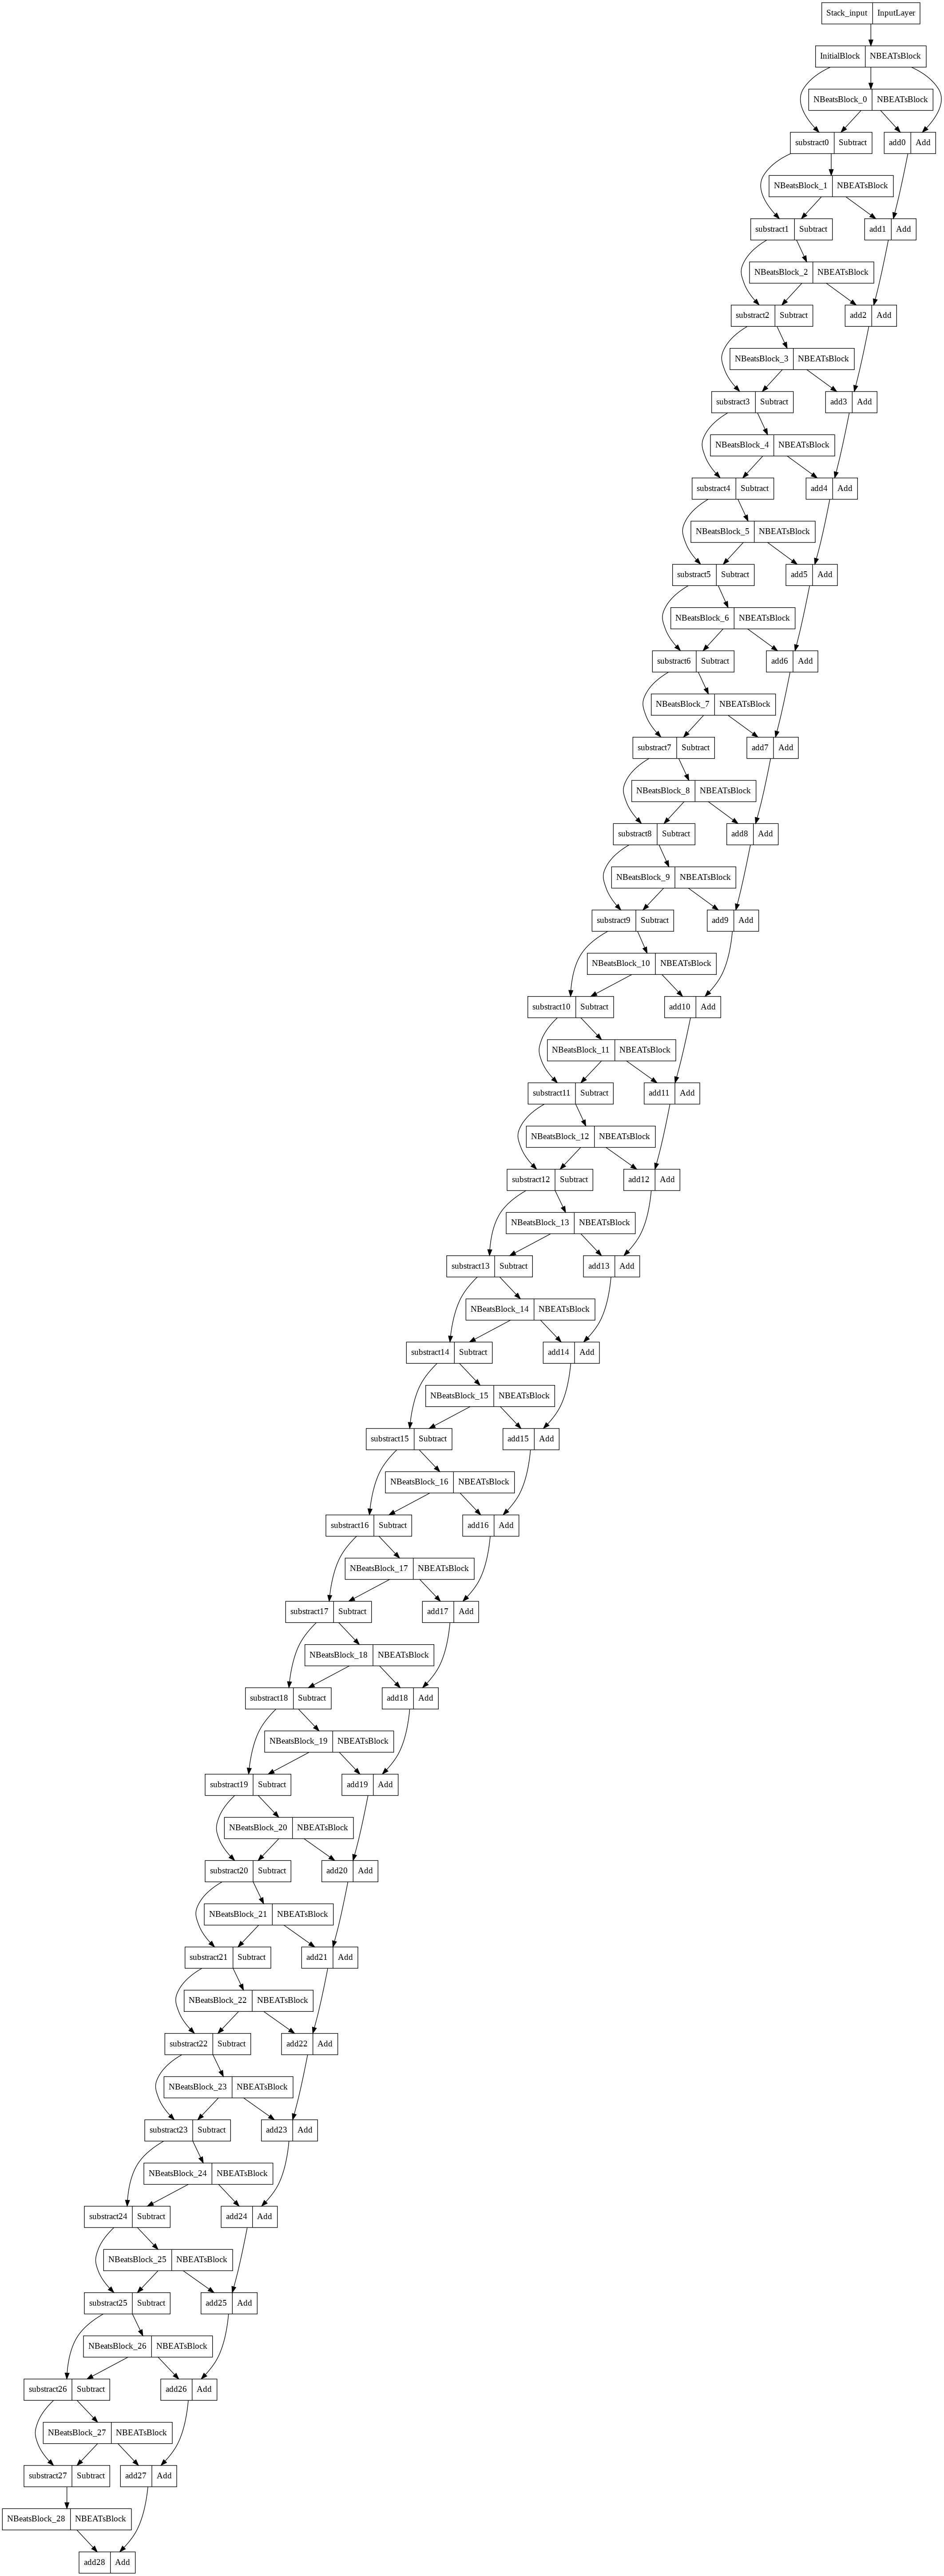

In [143]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [144]:
model_7.save(model_7.name)

INFO:tensorflow:Assets written to: Model_7_NBEATS/assets


INFO:tensorflow:Assets written to: Model_7_NBEATS/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [145]:
!nvidia-smi

Mon Nov 15 04:59:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    34W / 250W |   1601MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [146]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 770.2132


770.2131958007812

### Model 8: Ensemble

In [147]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  
  # Make empty list for trained ensenble models
  ensemble_models = []

  # create num_iter number of models per loss function
  for i in range(num_iter):
    # build and fit a new model with different loss function
    for loss_function in loss_fns:
      print(f"Optimizing models by reducing: {loss_function} for {num_epochs} epochs, model number :{i}")

      # Construct a simple model
      model = tf.keras.Sequential([
                                   tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                   tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                   tf.keras.layers.Dense(HORIZON)
      ])

      # compile the model
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model
      ensemble_models.append(model)
  
  return ensemble_models

In [148]:
%%time
# get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=10,
                                      num_epochs=1000)

Optimizing models by reducing: mae for 1000 epochs, model number :0

Epoch 00562: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00775: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00875: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing models by reducing: mse for 1000 epochs, model number :0

Epoch 00793: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00893: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing models by reducing: mape for 1000 epochs, model number :0

Epoch 00131: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing models by reducing: mae for 1000 epochs, model number :1
Optimizing models by reducing: mse for 1000 epochs, model number :1

Epoch 00483: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00583: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Opt

In [149]:
len(ensemble_models)

30

In [150]:
ensemble_models

In [153]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [156]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 290 ms, sys: 6.22 ms, total: 296 ms
Wall time: 261 ms


In [158]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean.shape

TensorShape([491])

In [159]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median.shape

(491,)

In [160]:
ensemble_results_mean = evaluate_preds(y_test,
                                       ensemble_mean)
ensemble_results_mean

{'mae': 765.5773,
 'mape': 2.6330893,
 'mase': 0.99459994,
 'mse': 1666893.1,
 'rmse': 1291.0822}

In [161]:
ensemble_results_median = evaluate_preds(y_test,
                                       ensemble_median)
ensemble_results_median

{'mae': 764.5864,
 'mape': 2.626677,
 'mase': 0.99331266,
 'mse': 1665166.1,
 'rmse': 1290.4132}

In [162]:
model_1_results

{'mae': 775.8202,
 'mape': 2.623344,
 'mase': 1.0013326,
 'mse': 1708697.4,
 'rmse': 1307.1715}

In [163]:
# find the upper and lower bounds of ensemble predictions
def get_upper_lower(preds):

  # measure the standard deviation of the prediction
  std = tf.math.reduce_std(preds, axis=0)

  # multiply the standard deviation by 1.96
  interval = 1.96 * std

  # get upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [164]:
# get the lower and upper of the 95 percentile interval prediction
lower,upper = get_upper_lower(ensemble_preds)

In [170]:
X_test.index

DatetimeIndex(['2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-05',
               ...
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30'],
              dtype='datetime64[ns]', name='Date', length=491, freq=None)

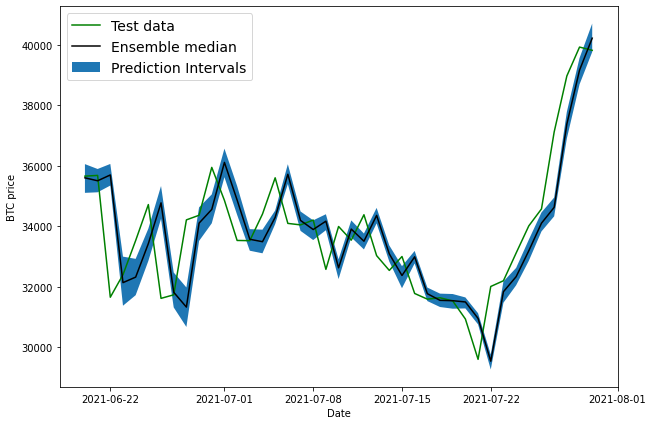

In [175]:
ensemble_median = np.median(ensemble_preds, axis=0)

# plot the median of ensemble preds along with prediction intervals
offset=450
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble median")
plt.xlabel("Date")
plt.ylabel("BTC price")

plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label = "Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

### mode 9: Train model on full historical dataset to make predictions into the future

In [176]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-02,325.22633,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,331.60083,25,325.22633,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,324.71833,25,331.60083,325.22633,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,331.60083,325.22633,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,331.60083,325.22633,NaN,NaN,NaN


In [177]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-07-26,34574.670661,6.25,34014.618359,33117.751462,32203.365638,32014.436034,29608.597253,30940.287284,31537.805190
2021-07-27,37114.296624,6.25,34574.670661,34014.618359,33117.751462,32203.365638,32014.436034,29608.597253,30940.287284
2021-07-28,38963.922857,6.25,37114.296624,34574.670661,34014.618359,33117.751462,32203.365638,32014.436034,29608.597253
2021-07-29,39917.449369,6.25,38963.922857,37114.296624,34574.670661,34014.618359,33117.751462,32203.365638,32014.436034
2021-07-30,39810.517971,6.25,39917.449369,38963.922857,37114.296624,34574.670661,34014.618359,33117.751462,32203.365638


In [178]:
# Train model on entire predictions
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [179]:
len(X_all), len(y_all)

(2455, 2455)

In [180]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024

dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [183]:
# Model 9

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                              tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                              tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                              tf.keras.layers.Dense(HORIZON)
], name="model_9_future_model")

# compile the model
model_9.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
      
# fit the model
history_9 = model_9.fit(dataset_all,
                          epochs=100,
                          verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 2622.4792 - mae: 2622.4792
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 1652.9833 - mae: 1652.9833
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 669.4166 - mae: 669.4166
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 546.2913 - mae: 546.2913
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1186.9561 - mae: 1186.9561
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 524.5285 - mae: 524.5285
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 448.2097 - mae: 448.2097
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 751.3229 - mae: 751.3229
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 700.2075 - mae: 700.2075
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 519.4209 - mae: 519.4209
Epoch 11/100
3/3 [===============